# temp data prep

### imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

cars = pd.read_csv('cars_clean.csv', low_memory=False)
cars = cars.drop(['title', 'url'], axis=1)

# select only consumption, condition, cubicCapacity, mileage, manufacturer, first_registration

# get for each column the unique values and store them in a dictionary
unique_values = {}

columns = ['airbag', 'climate_control', 'color', 'condition',
       'emission_class', 'fuel',
       'gear', 'interior', 'manufacturer']

for col in columns:
    unique_values[col] = cars[col].unique()

for col in cars.columns:
    if cars[col].dtype == 'object' or col == 'first_registration':
        cars[col] = pd.Categorical(cars[col])
        cars[col] = cars[col].cat.codes
    elif cars[col].dtype == 'float64':
        cars[col] = cars[col].astype('float32')

for col in ['emission_class', 'num_of_owners', 'cabrio', 'kleinwagen',
            'limousine', 'sportwagen', 'geländewagen', 'van', 'kombi']:
    if col in cars.columns:
        cars[col] = pd.Categorical(cars[col])
        cars[col] = cars[col].cat.codes

Y = cars['price']
X = cars.drop(['price'], axis=1)

X = pd.get_dummies(X, columns=columns, prefix_sep="-")

# rename columns by replacing numbers with their indexes in the dictionary
for col in X.columns:
    c = str(col).split("-")
    if c[0] in unique_values:
        if c[0] in ["emission_class"]:
            X.rename(columns={col: c[0] + "_" + str(unique_values[c[0]][int(c[1])])}, inplace=True)
        else:
            X.rename(columns={col: str(unique_values[c[0]][int(c[1])])}, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42069, shuffle=False)

def convert(x):
    cars_categorical = x.select_dtypes(include=['int8', 'int64'])
    cars_numerical = x.select_dtypes(include=['float32'])
    return cars_categorical, cars_numerical

In [2]:
# print the amount of columns of cars
print(len(cars.columns))

26


# Lineare Regression


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split


#### import wieder aktivieren!

In [4]:
# from dataset import x_train, x_test, y_train, y_test, convert, columns

# categorical_train, numeric_train = convert(x_train)

In [5]:
print(x_train.columns)
print(x_test.columns)

Index(['co2', 'consumption', 'cubicCapacity', 'doors', 'first_registration',
       'mileage', 'num_of_owners', 'num_seats', 'power', 'cabrio',
       ...
       'mclaren', 'maserati', 'ferrari', 'lada', 'maybach', 'lotus',
       'cadillac', 'hummer', 'tesla', 'morgan'],
      dtype='object', length=132)
Index(['co2', 'consumption', 'cubicCapacity', 'doors', 'first_registration',
       'mileage', 'num_of_owners', 'num_seats', 'power', 'cabrio',
       ...
       'mclaren', 'maserati', 'ferrari', 'lada', 'maybach', 'lotus',
       'cadillac', 'hummer', 'tesla', 'morgan'],
      dtype='object', length=132)


In [6]:
# create linear regression object
regr = lm.LinearRegression()

# fit the model to the training data
regr.fit(x_train, y_train)

LinearRegression()

Mean Absolute Error: 5812.832648435758
Coefficients: [ 6.37781483e+01 -3.15230565e+02 -5.01625347e+00 -1.57885590e+03
  1.58915018e+03 -7.13440396e-02 -9.19685216e+02  1.13618519e+03
  1.43139190e+02  1.45500633e+01 -1.57246243e+03 -2.70103341e+03
 -2.41508700e+03 -4.87250970e+02 -2.49934011e+02  2.61172450e+02
 -4.85934763e+02  6.61807527e+02 -1.72072346e+03  1.54485070e+03
 -3.87761824e+03 -1.07380214e+03  5.59055142e+03  4.06829278e+03
  5.31712618e+02 -1.57549679e+03 -3.66363964e+03 -6.99791176e+02
  3.14414361e+02 -8.94993730e+01 -6.94327991e+02  5.06405573e+02
  2.14273595e+02 -1.12925286e+02  2.29382496e+03 -3.62824694e+01
 -4.96464548e+02 -1.68756715e+02 -8.18347944e+01 -2.76233877e+02
 -6.72802259e+02 -1.12450209e+03 -2.75020199e+03 -2.28941153e+03
 -5.53819364e+03  2.07973094e+03 -1.48694666e+03 -2.99913418e+03
  3.36891173e+03  2.30589107e+03  1.06742024e+03  3.69539774e+03
  3.67103836e+03  1.10914085e+04  7.23816395e+03  1.88485399e+03
 -3.04735500e+03 -8.91110658e+03 -8.2

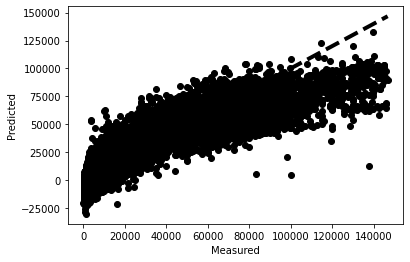

In [7]:
# make predictions on the test data
y_pred = regr.predict(x_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# print the coefficients and intercept term
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

# plot outputs
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [8]:
# show the impact of each feature on the model
import pandas as pd
# create a dataframe with the coefficients
coef = pd.DataFrame(regr.coef_, x_train.columns, columns=['Coefficient'])
print(len(coef))

132


In [9]:
from pprint import pprint
pprint(coef.to_dict())

{'Coefficient': {'2-zonen-klimaautomatik': -1073.8021366847643,
                 '3-zonen-klimaautomatik': -1575.4967888283727,
                 '4-zonen-klimaautomatik': 531.7126178597373,
                 'abarth': -2408.854481215346,
                 'alcantara': 1506.8594748998107,
                 'alfa romeo': 51382.49686835191,
                 'andere': -717.2856965400501,
                 'aston martin': -9130.081067038223,
                 'audi': -5707.291399934698,
                 'autogas': 3061.769228325802,
                 'automatic climatisation, 4 zones': -3663.639643231899,
                 'automatik': -1140.2496475380606,
                 'beige': -276.2338765628972,
                 'bentley': -298.4411007125382,
                 'benzin': -725.9473005434938,
                 'beschädigt': -2999.134175504913,
                 'beschädigt, nicht fahrtauglich': -1486.9466565188786,
                 'beschädigt, unfallfahrzeug': -2750.2019925200552,
            

In [10]:
cl = coef.to_dict()["Coefficient"]
cl = {k: v for k, v in sorted(cl.items(), key=lambda item: abs(item[1]), reverse=True)}
print("Intercept:", regr.intercept_)
print("Coefficients sorted by impact: ")
pprint(cl, sort_dicts=False)

Intercept: -19633.323271708377
Coefficients sorted by impact: 
{'land rover': 78375.55033150376,
 'honda': 59317.87137760768,
 'alfa romeo': 51382.49686835191,
 'saab': 47413.03447731711,
 'iveco': 46683.01755011929,
 'dacia': 33280.917213051966,
 'nissan': 32636.659329205835,
 'cadillac': -26627.049612761235,
 'infiniti': -18814.018860974596,
 'lada': -17842.172758694265,
 'lamborghini': 16427.31246649434,
 'volvo': -16014.772173857722,
 'toyota': -15200.145109356119,
 'mitsubishi': 15187.84483001869,
 'mazda': -14888.540667996478,
 'hyundai': -13623.407797699914,
 'lancia': -12891.296383304454,
 'mg': -12757.090812732129,
 'emission_class_6': 11091.40848438356,
 'porsche': -9998.454409940845,
 'kia': -9749.637305097482,
 'ds': -9729.16067248494,
 'suzuki': -9548.616630773462,
 'ford': -9442.791891725139,
 'jeep': -9307.056462977209,
 'mercedes-benz': -9245.59634577767,
 'aston martin': -9130.081067038223,
 'jaguar': -8962.04450624957,
 'emission_class_1': -8911.106581394197,
 'smart'

In [11]:
# create a plot which shows the impact, use the abs values but make the bar red if negative and blue if positive


In [12]:
# get a random sample from x_test and the corresponding y_test
x_test_sample = x_test.sample(n=1)
y_test_sample = y_test.sample(n=1)

# make a prediction
y_pred_sample = regr.predict(x_test_sample)

# print the actual and predicted values
print("Actual:", y_test_sample.values[0])
print("Predicted:", y_pred_sample[0])


Actual: 50399.0
Predicted: 28102.141117186435


In [13]:
# calculate the difference between the actual and predicted values for each prediction and store it in a list
df = pd.DataFrame()

# add a column to y_test with the actual values
df['actual'] = y_test

# add a column to y_pred with the predicted value
df['predicted'] = y_pred

# add a column to df with the difference between the actual and predicted values and take the abs
df['diff'] = abs(df['actual'] - df['predicted'])

df['diff'] = df[df["diff"] < 350000]


In [14]:
# calculate the mean deviation of the non-outliers
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5812.832648435758


In [15]:
def set_color(_fig, _ax):
    _fig.patch.set_facecolor('#1b212c')
    _ax.patch.set_facecolor('#1b212c')
    _ax.spines['bottom'].set_color('white')
    _ax.spines['top'].set_color('white')
    _ax.spines['left'].set_color('white')
    _ax.spines['right'].set_color('white')
    _ax.xaxis.label.set_color('white')
    _ax.yaxis.label.set_color('white')
    _ax.grid(alpha=0.1)
    _ax.title.set_color('white')
    _ax.tick_params(axis='x', colors='white')
    _ax.tick_params(axis='y', colors='white')

c:\users\morie\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


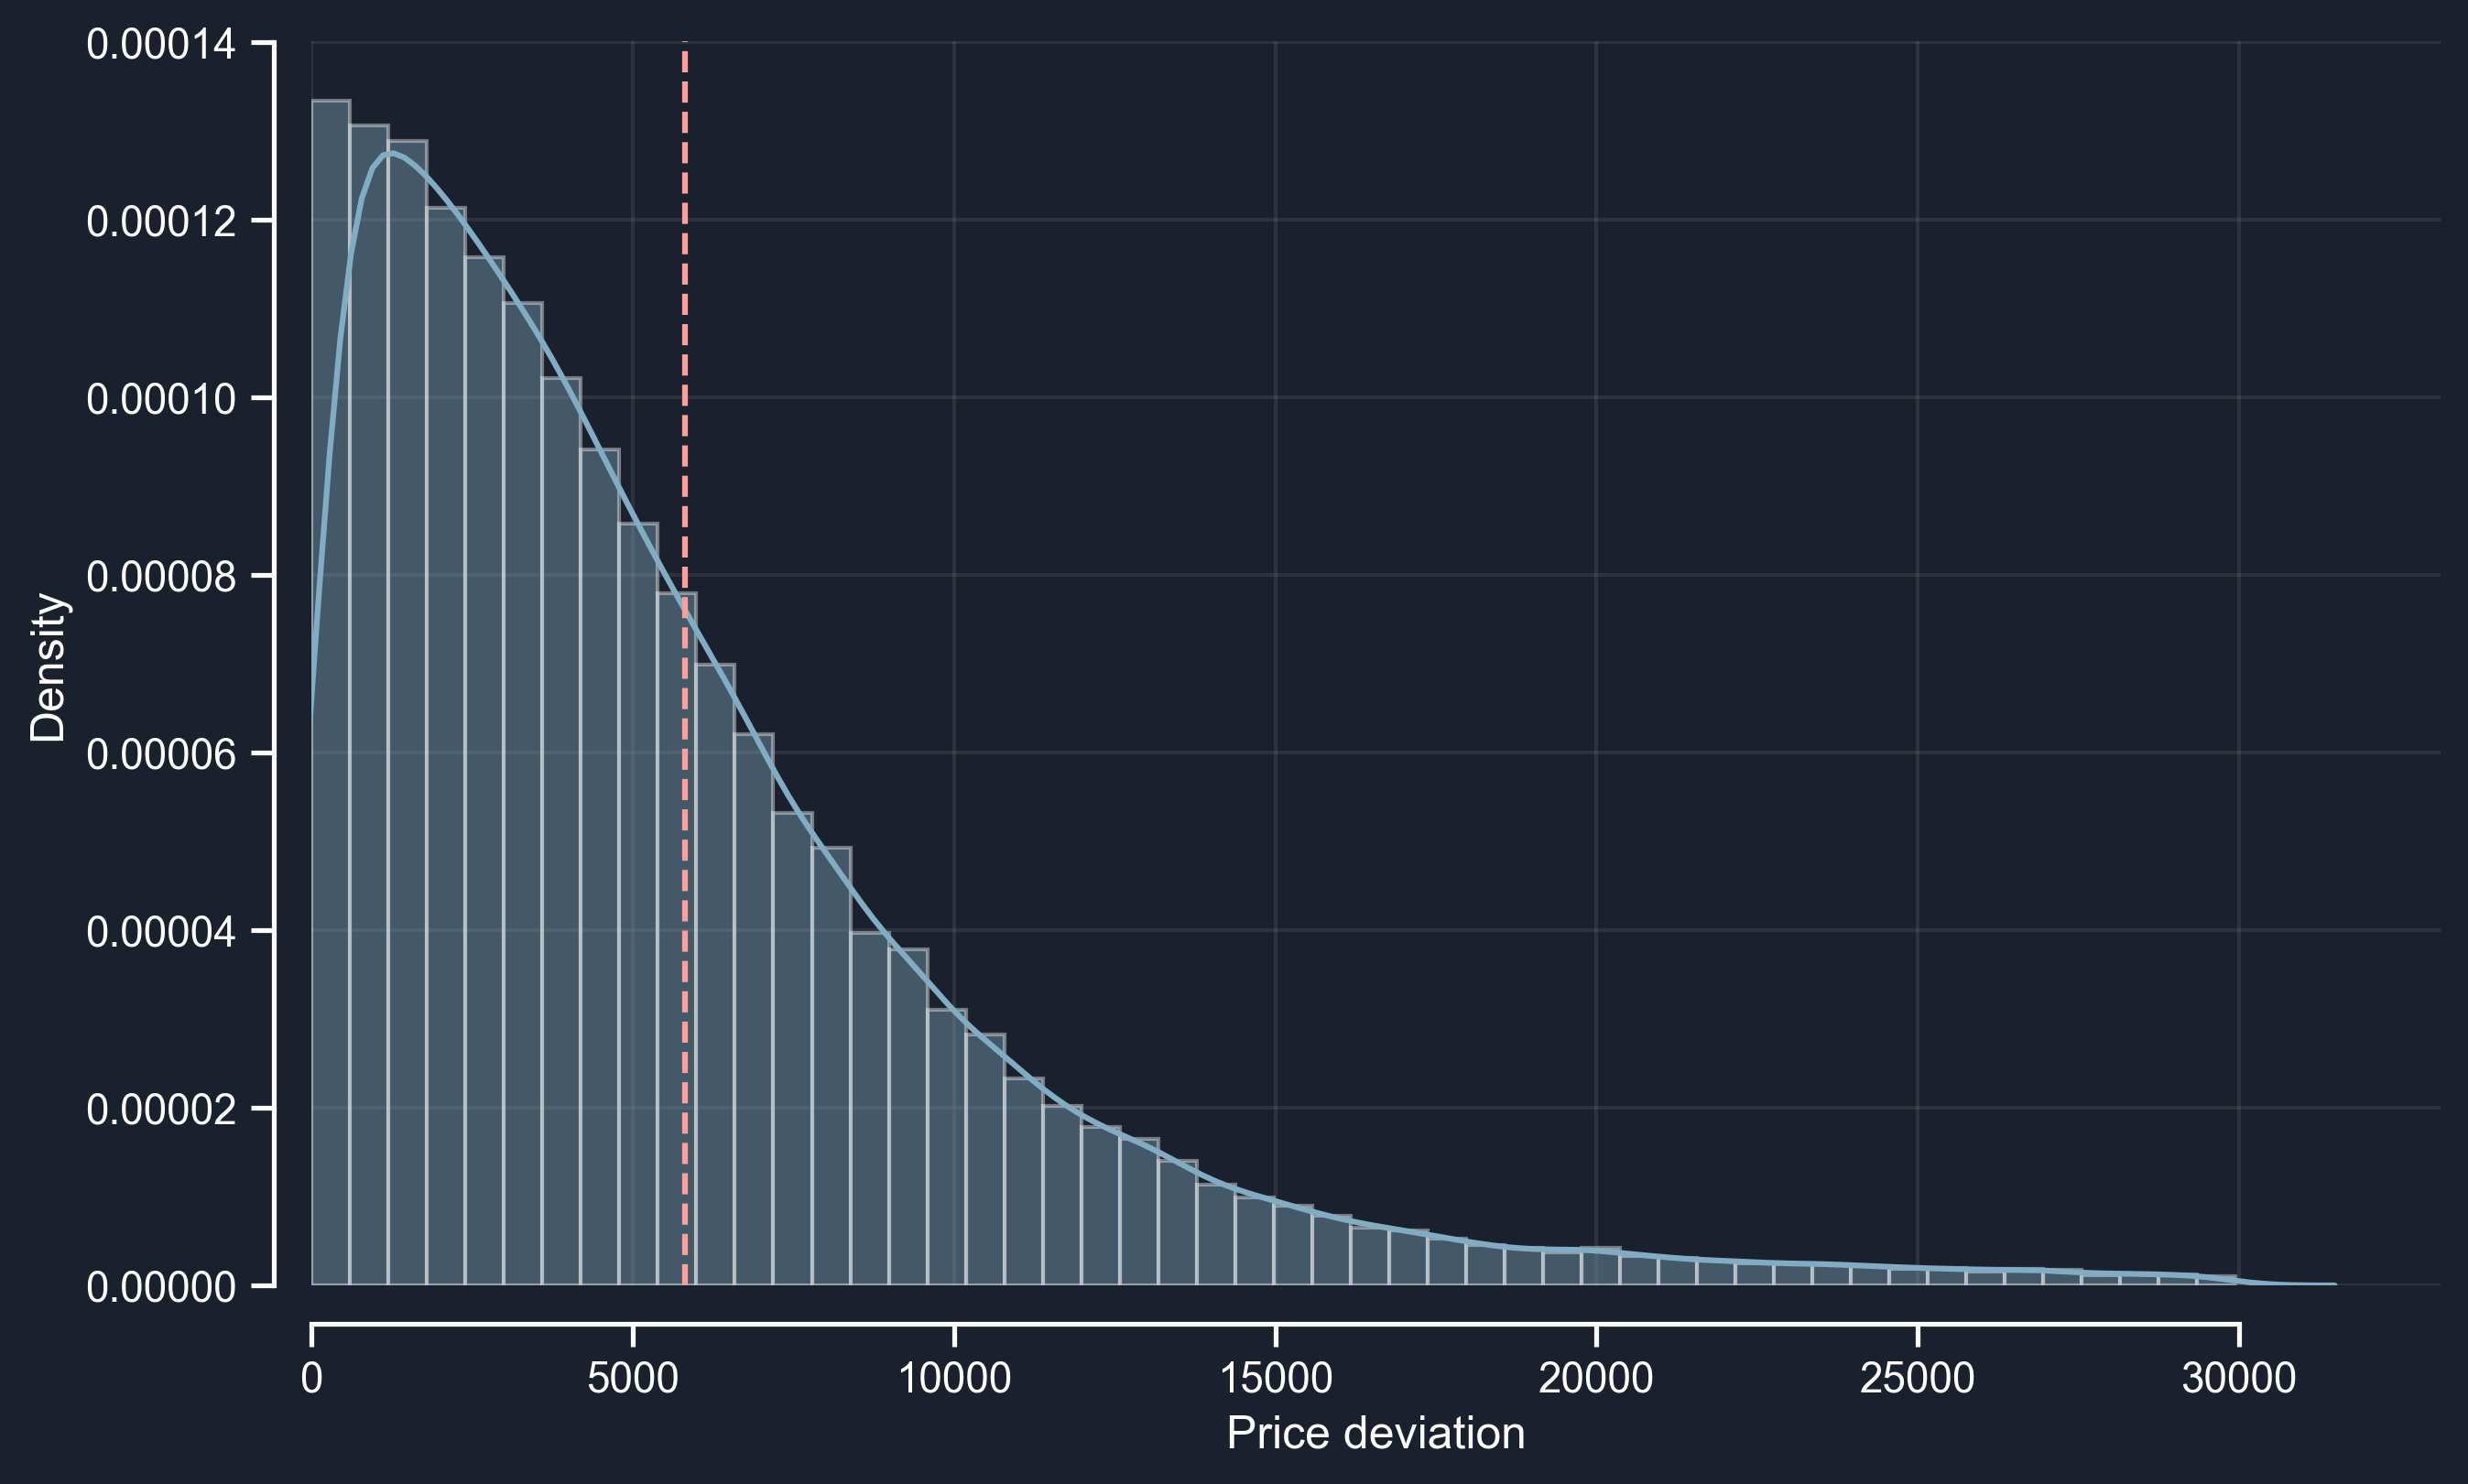

In [16]:
import seaborn as sns

df = pd.DataFrame()

# add a column to y_test with the actual values
df['actual'] = y_test

# add a column to y_pred with the predicted value
df['predicted'] = y_pred

df['diff'] = abs(y_test - y_pred)

df2 = df[df["diff"] < 30000]

sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
sns.distplot(df2["diff"], color="#81acc3", hist_kws=dict(alpha=0.4), fit_kws=dict(alpha=1), ax=ax)

plt.axvline(np.mean(df["diff"]), color='r', linestyle='--', label='Median')

sns.despine(offset=10, trim=True)
set_color(fig, ax)
plt.xlabel('Price deviation')
plt.xlim(0, None)
plt.savefig('./plots/regr_error_dist.png', dpi=300)
plt.show()

# Entscheidungsbaum


In [17]:
results = {}
for i in range(25):
    regr = DecisionTreeRegressor(max_depth=i+1)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    results[i] = metrics.mean_absolute_error(y_test, y_pred)

In [18]:
results[24]

2948.277827061218

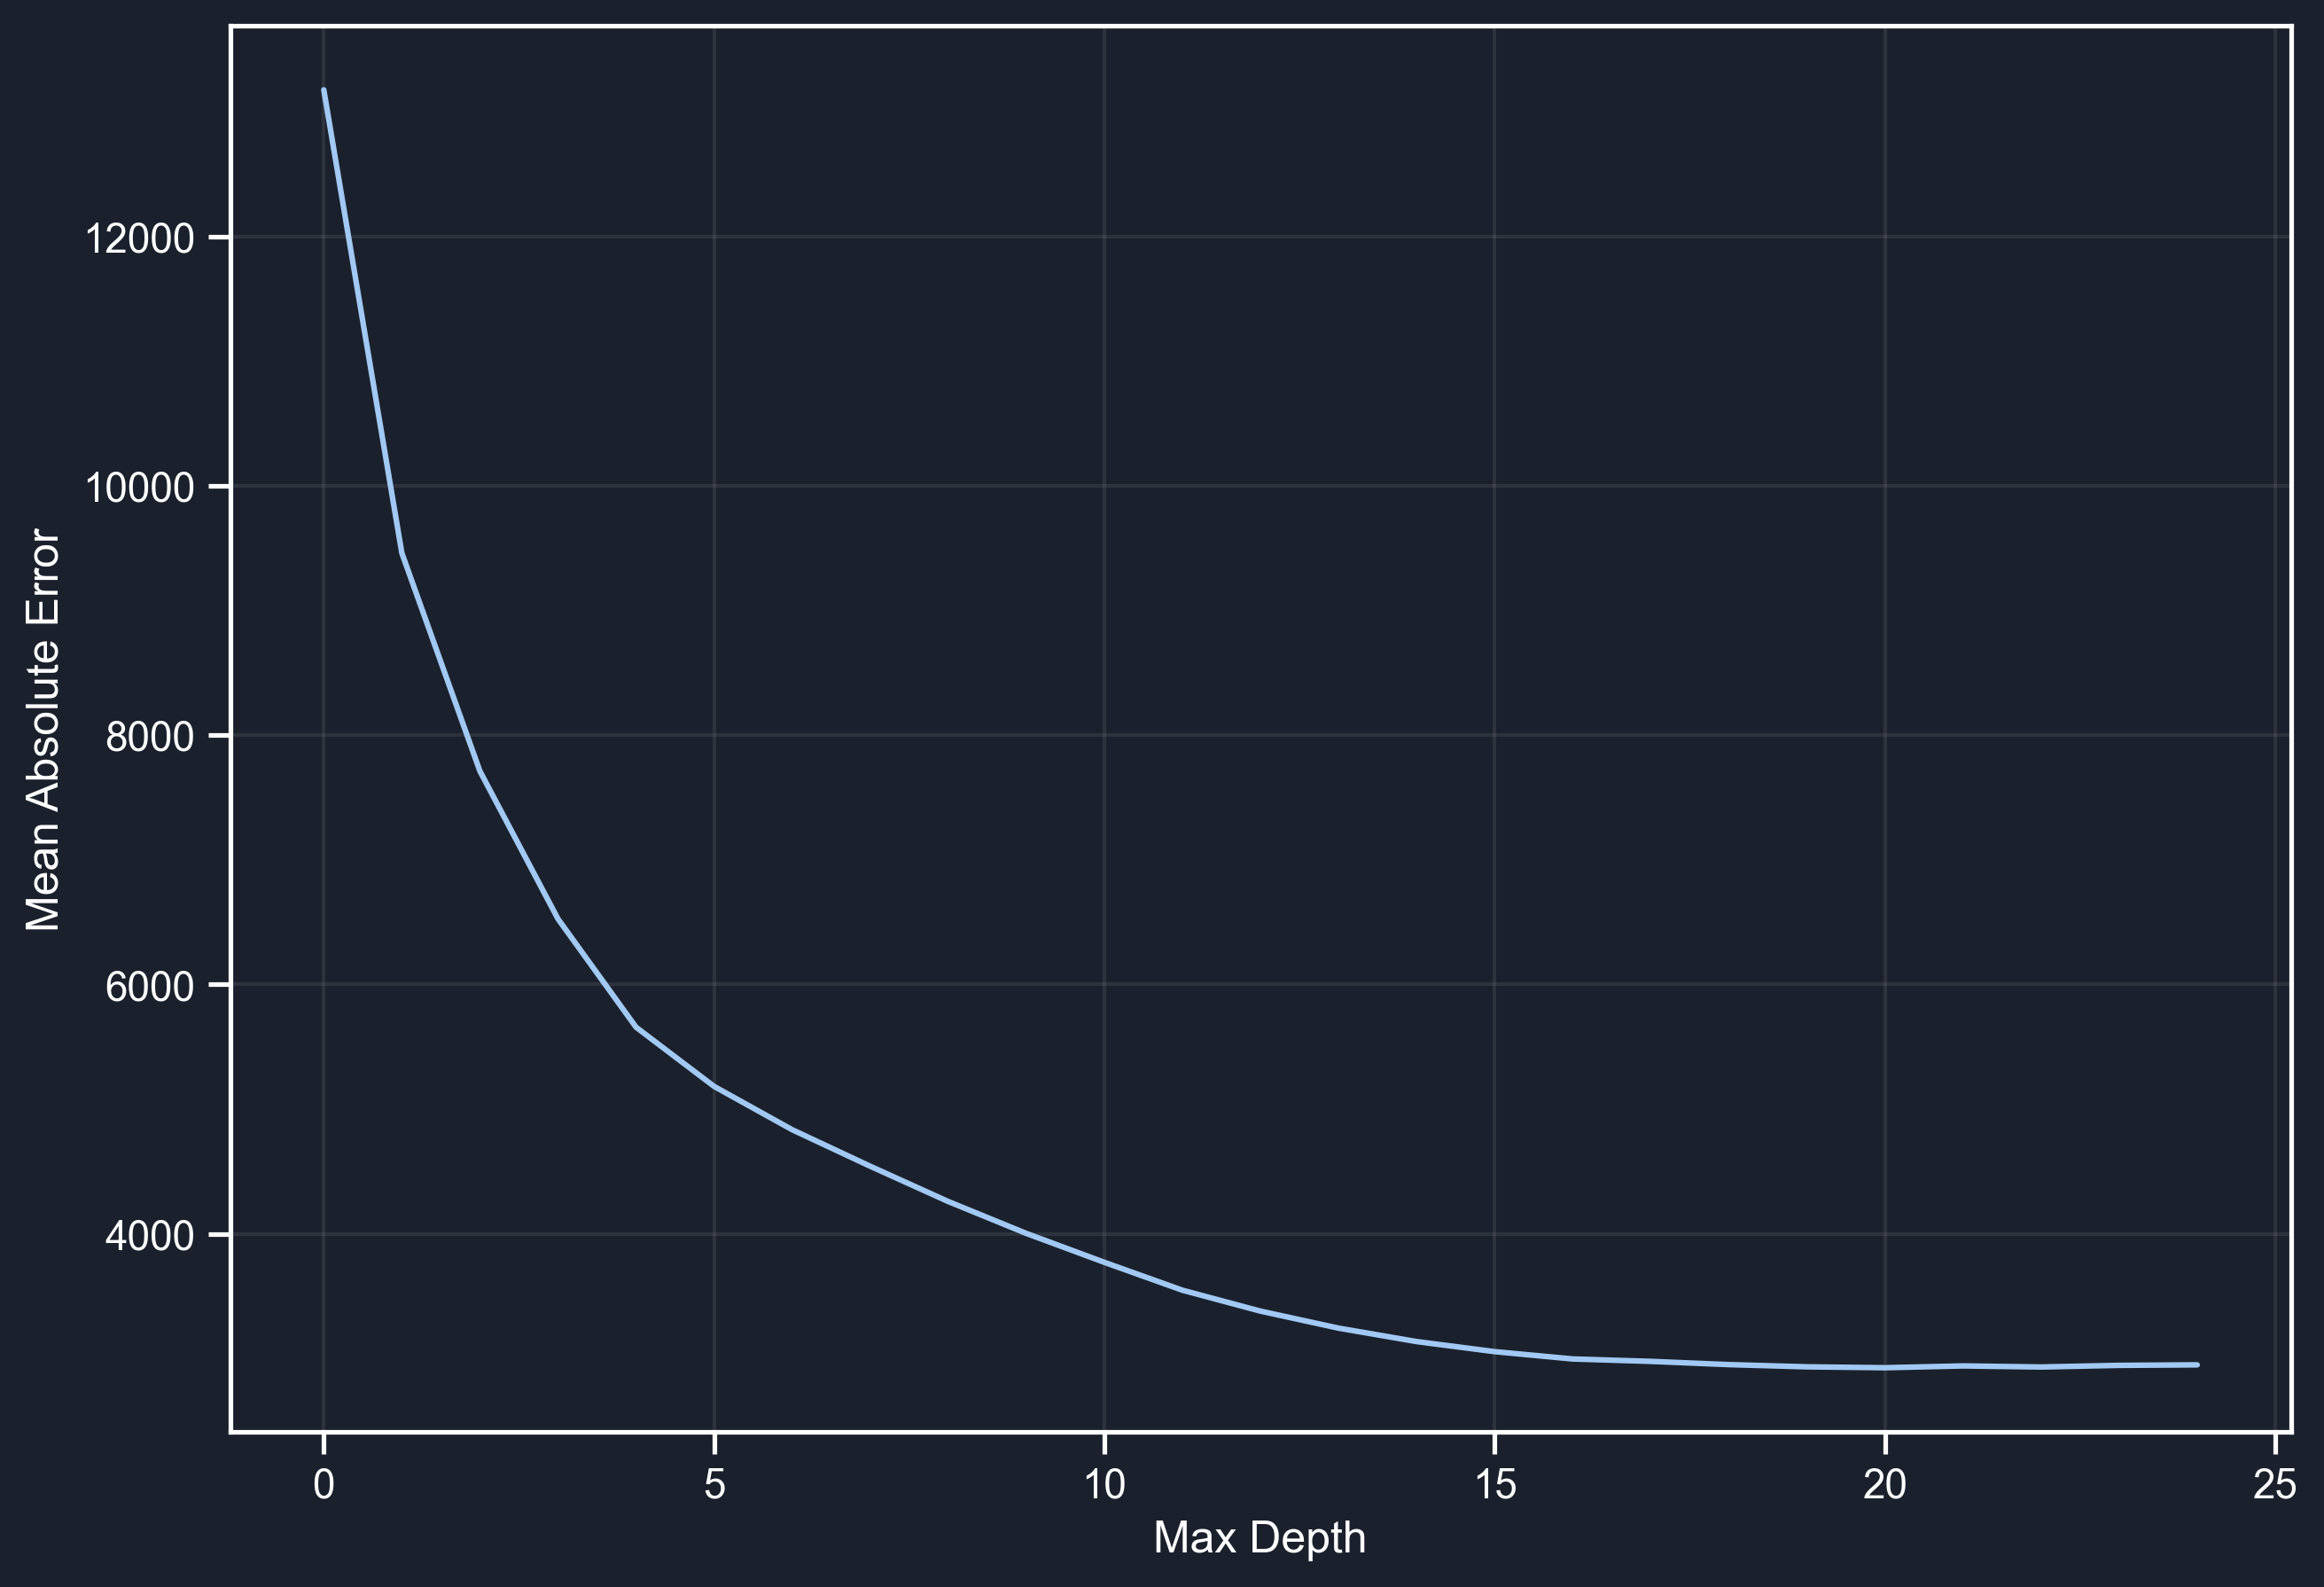

In [19]:
# create a line plot of the mean absolute error for each max_depth with seaborn
import seaborn as sns

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 7), dpi=300)

sns.lineplot(x=list(results.keys()), y=list(results.values()), ax=ax1)
plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')

set_color(fig, ax1)
plt.savefig('plots/max_depth.png', dpi=300)
plt.show()

c:\users\morie\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


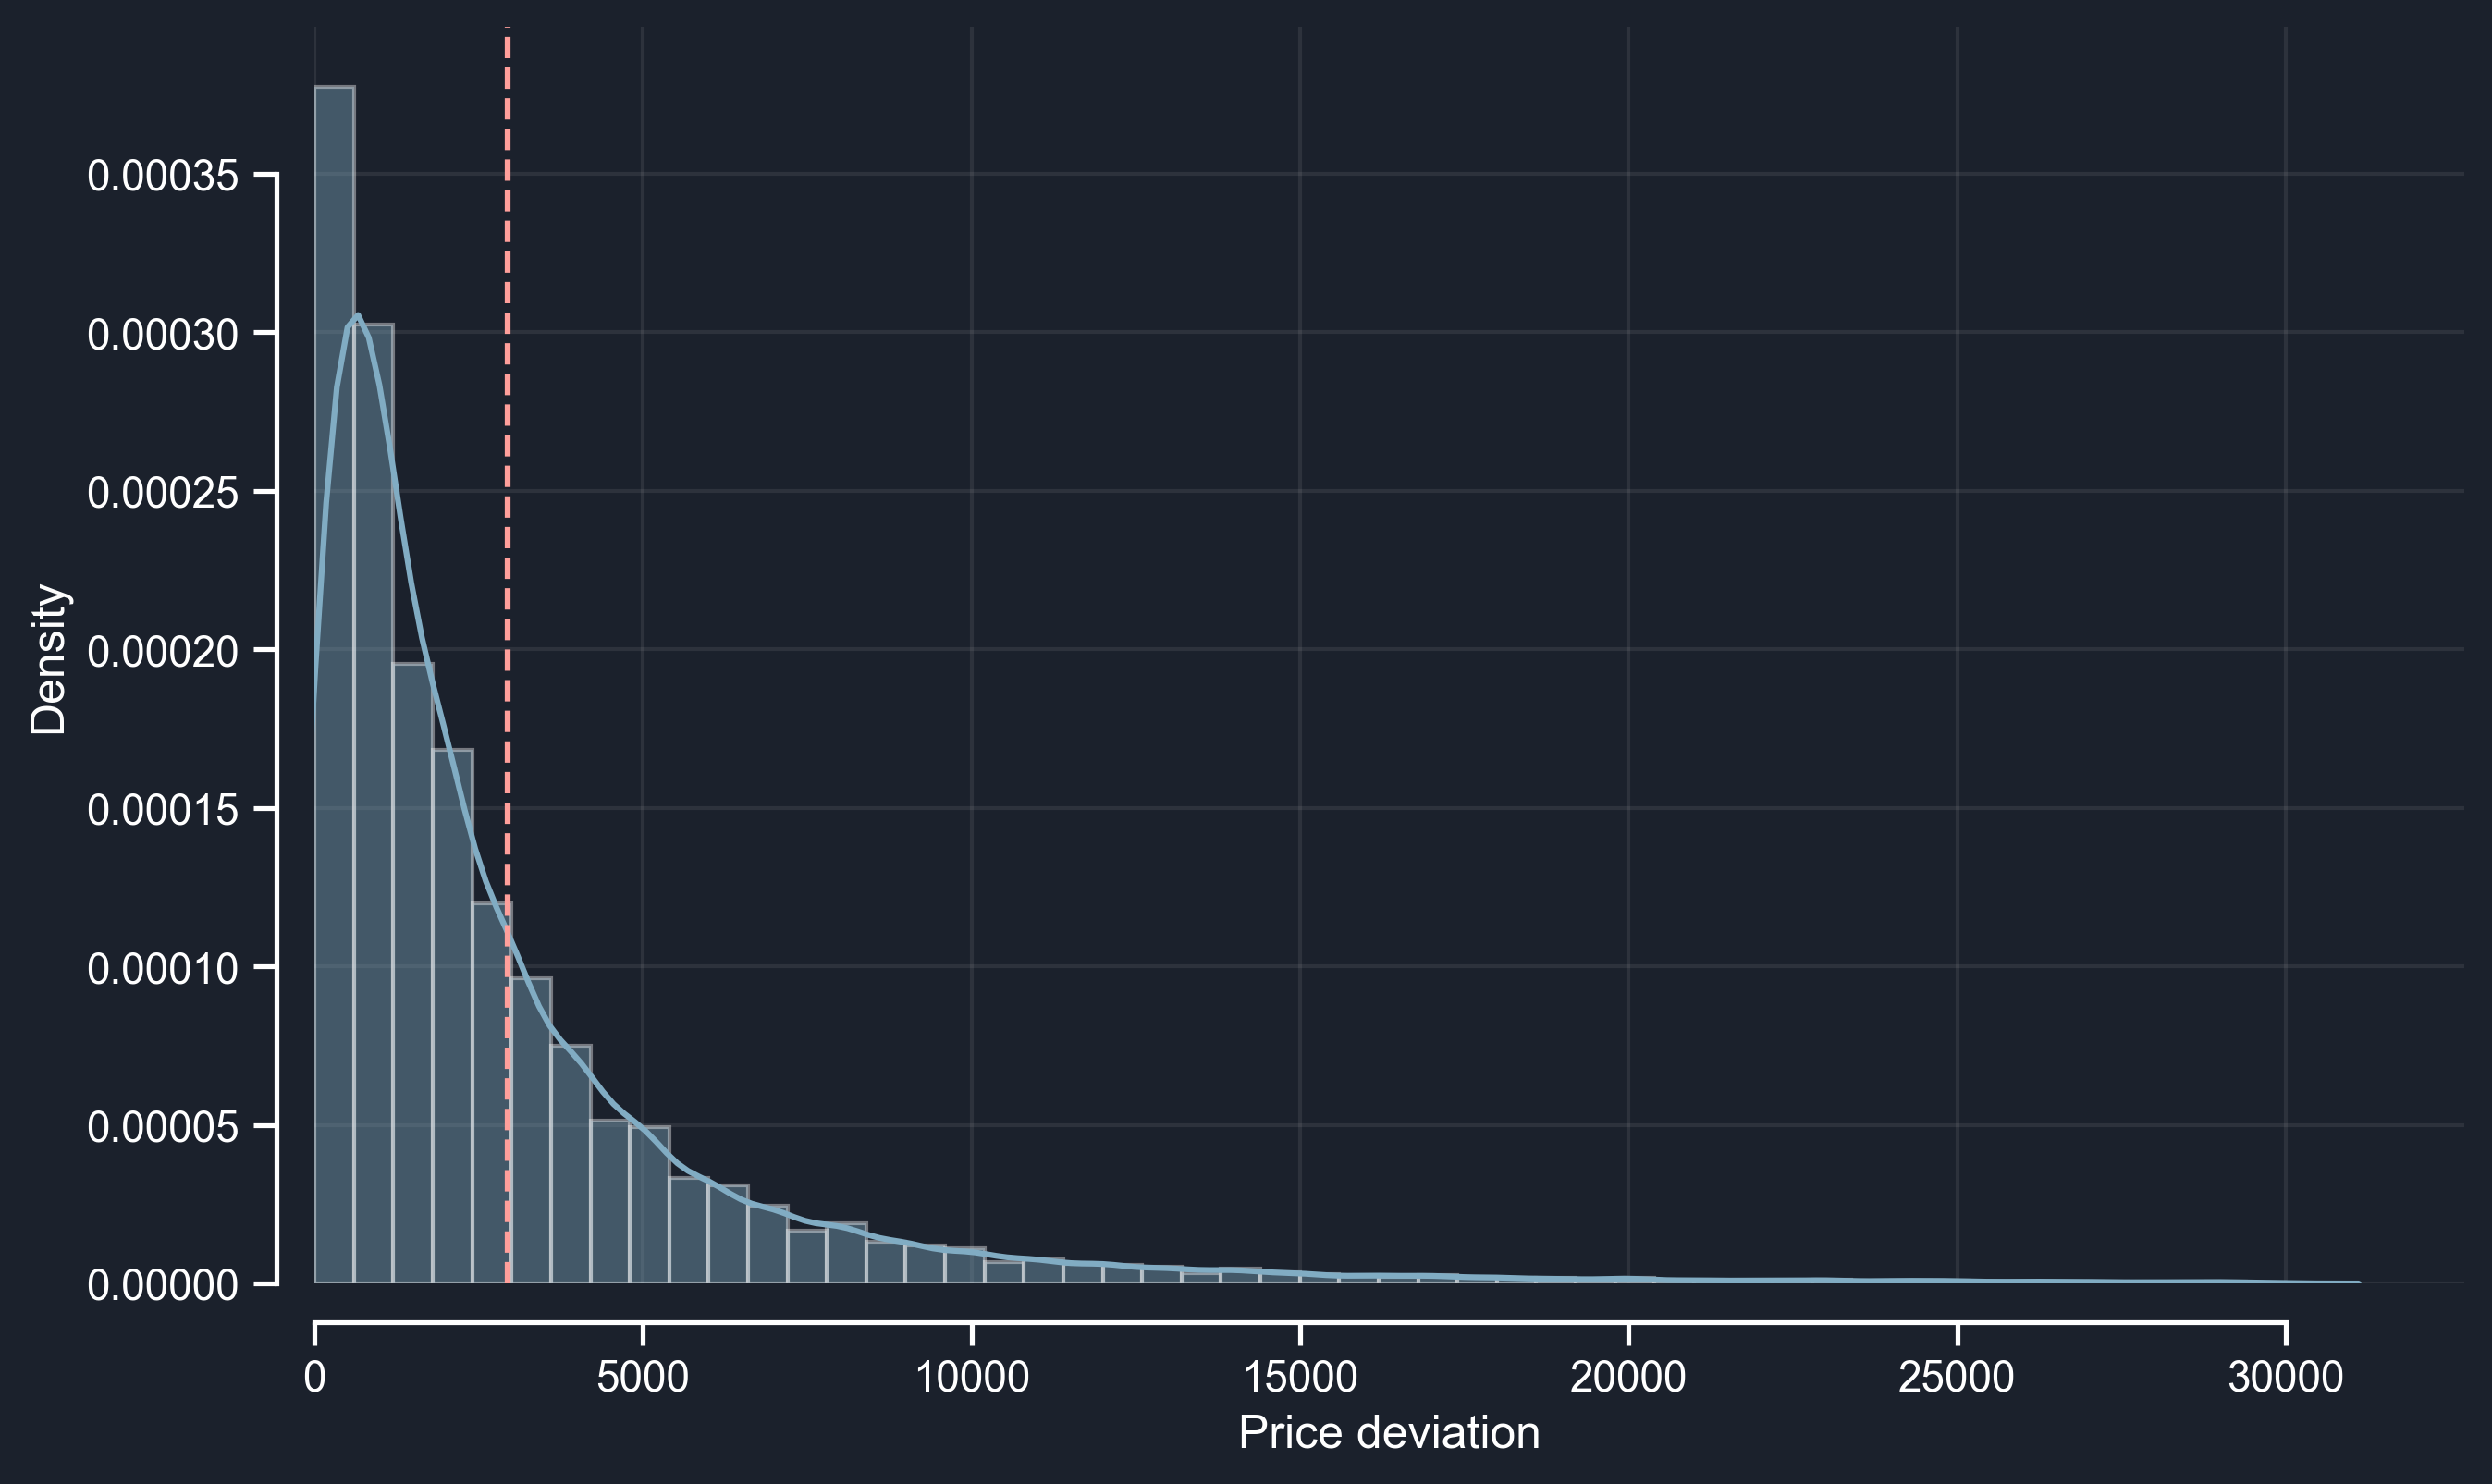

In [20]:
regr = DecisionTreeRegressor(max_depth=25)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

df = pd.DataFrame()

# add a column to y_test with the actual values
df['actual'] = y_test

# add a column to y_pred with the predicted value
df['predicted'] = y_pred

df['diff'] = abs(y_test - y_pred)

df2 = df[df["diff"] < 30000]

sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
sns.distplot(df2["diff"], color="#81acc3", hist_kws=dict(alpha=0.4), fit_kws=dict(alpha=1), ax=ax)

plt.axvline(np.mean(df["diff"]), color='r', linestyle='--', label='Median')

sns.despine(offset=10, trim=True)
set_color(fig, ax)
plt.xlabel('Price deviation')
plt.xlim(0, None)
plt.savefig('./plots/tree_error_dist.png', dpi=300)
plt.show()

In [21]:
# create a decision tree regressor
regr_tree = DecisionTreeRegressor(max_depth=50)

# fit the model to the training data
regr_tree.fit(x_train, y_train)

# make predictions on the test data
y_pred_tree = regr_tree.predict(x_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_tree))


Mean Absolute Error: 2989.384696044539
